# Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
congressional_voting_records = fetch_ucirepo(id=105) 
  
# data (as pandas dataframes) 
X = congressional_voting_records.data.features 
y = congressional_voting_records.data.targets 
  
# metadata 
print(congressional_voting_records.metadata) 
  
# variable information 
print(congressional_voting_records.variables) 

{'uci_id': 105, 'name': 'Congressional Voting Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/105/congressional+voting+records', 'data_url': 'https://archive.ics.uci.edu/static/public/105/data.csv', 'abstract': '1984 United Stated Congressional Voting Records; Classify as Republican or Democrat', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 435, 'num_features': 16, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Mon Apr 27 1987', 'dataset_doi': '10.24432/C5C01P', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA.  The CQA lists nine different types of votes: voted for, paired for, and announced for (th

# Preprocessing
Encode Features (if necessary): Ensure all features are encoded as integers (0/1). Many Bayesian network libraries require numerical inputs.
Feature Analysis: Look for redundant features or those with minimal variance.
Split Data: Divide the dataset into training and testing sets for later validation

In [3]:
result = pd.concat([X, y], axis=1)
result

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y,republican


In [8]:
data_filled = result.copy()

# Iterate over each column and apply the encoding
for col in data_filled.columns:
    # Check for NaN values (missing votes) and replace them with '2' for "present"
    data_filled[col].fillna('p', inplace=True)
    
    '''# Replace binary categorical values (e.g., "yea" and "nay") with '1' and '0', respectively.
    # You can adjust this based on your dataset (assuming 'yea' and 'nay' are the values).
    data_filled[col] = data_filled[col].replace({'y': 1, 'n': 0})
    
    # Make sure that the "present" votes are encoded as 2.
    # If the data has a "present" or another placeholder for present votes, adjust accordingly.
    data_filled[col] = data_filled[col].replace({'p': 2})'''


C:\Users\amate\AppData\Local\Temp\ipykernel_15444\3003585522.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[col].fillna('p', inplace=True)


In [45]:
 data_filled

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,p,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,p,republican
2,p,y,y,p,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,p,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,p,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,p,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,p,p,p,p,n,y,y,y,n,y,republican


In [39]:
encoded_df

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,2,0,2,2,2,0,0,0,2,1,2,2,2,0,2,1
1,0,2,0,2,2,2,0,0,0,0,0,2,2,2,0,1,1
2,1,2,2,1,2,2,0,0,0,0,2,0,2,2,0,0,0
3,0,2,2,0,1,2,0,0,0,0,2,0,2,0,0,2,0
4,2,2,2,0,2,2,0,0,0,0,2,1,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,2,2,2,2,0,0,2,2,0,2,2,2,0,2,1
431,0,0,2,0,0,0,2,2,2,2,0,0,0,0,0,2,0
432,0,1,0,2,2,2,0,0,0,0,2,2,2,2,0,2,1
433,0,0,0,2,2,2,1,1,1,1,0,2,2,2,0,2,1


# Select Bayesian Network Library
Choose a Python library to work with Bayesian Networks, such as:

pgmpy: Comprehensive library for probabilistic graphical models.
bnlearn: Focused on Bayesian Network learning.
Pyro: More flexible but complex, designed for probabilistic programming.

In [ ]:
!pip install pgmpy

# Build a Bayesian Network

Structure Learning: Learn the structure of the network using the dataset.
Use score-based methods (e.g., BIC, BDeu) or constraint-based methods (e.g., PC algorithm).

Overview of Scoring Methods
- BIC (Bayesian Information Criterion): Penalizes complexity more heavily; good for smaller datasets.
- AIC (Akaike Information Criterion): Less strict penalization than BIC; balances fit and complexity.
- MDL (Minimum Description Length): Similar to BIC; focuses on model simplicity.
- K2: Assumes a prior ordering of nodes; works well for causal discovery.
- BDe (Bayesian Dirichlet Equivalent): Assumes a uniform prior.
- BDeu (Bayesian Dirichlet Equivalent Uniform): Incorporates a hyperparameter (
𝛼
α) for uniform prior strength.

## Scoring and model comparison

In [28]:
# structure from data
from pgmpy.estimators import PC
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore, BDsScore

In [40]:
# 1. PC constraing based estimator
pc = PC(data_filled)
model_pc = pc.estimate()

# 2. Hill Climb: heuristic

state_names = {
    'handicapped-infants': ['y', 'n', 'p'],
    'water-project-cost-sharing': ['y', 'n', 'p'],
    'adoption-of-the-budget-resolution': ['y', 'n', 'p'],
    'physician-fee-freeze': ['y', 'n', 'p'],
    'el-salvador-aid': ['y', 'n', 'p'],
    'religious-groups-in-schools': ['y', 'n', 'p'],
    'anti-satellite-test-ban': ['y', 'n', 'p'],
    'aid-to-nicaraguan-contras': ['y', 'n', 'p'],
    'mx-missile': ['y', 'n', 'p'],
    'immigration': ['y', 'n', 'p'],
    'synfuels-corporation-cutback': ['y', 'n', 'p'],
    'education-spending': ['y', 'n', 'p'],
    'superfund-right-to-sue': ['y', 'n', 'p'],
    'crime': ['y', 'n', 'p'],
    'duty-free-exports': ['y', 'n', 'p'],
    'export-administration-act-south-africa': ['y', 'n', 'p'],
    'Class': ['democrat', 'republican']
}

Working for n conditional variables: 5: 100%|████████████████████████████████████████████| 5/5 [00:43<00:00,  8.61s/it]


In [41]:
hc = HillClimbSearch(data_filled, state_names = state_names)

# Estimate models with different scoring methods
model_k2 = hc.estimate(scoring_method=K2Score(data_filled))

  0%|                                                                         | 142/1000000 [00:10<20:39:25, 13.45it/s]


In [42]:
model_bdeu = hc.estimate(scoring_method=BDeuScore(data_filled))

  0%|                                                                          | 32/1000000 [00:02<17:54:24, 15.51it/s]


In [43]:
model_bic = hc.estimate(scoring_method= BicScore(data_filled))

  0%|                                                                          | 17/1000000 [00:01<21:47:40, 12.75it/s]


In [44]:
model_bds = hc.estimate(scoring_method=BDsScore(data_filled))

  0%|                                                                          | 29/1000000 [00:01<18:18:51, 15.17it/s]


In [47]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore

# Initialize structure learning algorithms
hc = HillClimbSearch(data_filled)

# List of scores to compare
scores = {
    "BIC": BicScore(data_filled),
    "K2": K2Score(data_filled),
    "BDeu": BDeuScore(data_filled, equivalent_sample_size=5),  # You can tune equivalent_sample_size
    "BDs": BDsScore(data_filled)
}

"""El tamaño de muestra equivalente (ESS) es un parámetro importante cuando se utiliza el BDeuScore para puntuar una red bayesiana. Define cuánta información previa (suavizado) debe incorporarse en las estimaciones de probabilidad de la red. La elección del ESS depende de cuánto confíes en los datos observados en comparación con el conocimiento previo.

ESS grande → mayor influencia del conocimiento previo (suavizado más fuerte).
ESS pequeño → mayor dependencia de los datos observados."""

# Perform structure learning and store scores
results = {}
for score_name, scoring_method in scores.items():
    model = hc.estimate(scoring_method=scoring_method)
    results[score_name] = model

# Print results for comparison
for score_name, model in results.items():
    print(f"Score: {score_name}")
    print(f"Edges: {model.edges()}")


  0%|                                                                          | 29/1000000 [00:01<17:16:19, 16.08it/s]

Score: BIC
Edges: [('physician-fee-freeze', 'Class'), ('physician-fee-freeze', 'adoption-of-the-budget-resolution'), ('physician-fee-freeze', 'duty-free-exports'), ('physician-fee-freeze', 'handicapped-infants'), ('el-salvador-aid', 'mx-missile'), ('el-salvador-aid', 'physician-fee-freeze'), ('el-salvador-aid', 'crime'), ('el-salvador-aid', 'religious-groups-in-schools'), ('el-salvador-aid', 'superfund-right-to-sue'), ('religious-groups-in-schools', 'education-spending'), ('anti-satellite-test-ban', 'export-administration-act-south-africa'), ('anti-satellite-test-ban', 'immigration'), ('aid-to-nicaraguan-contras', 'el-salvador-aid'), ('aid-to-nicaraguan-contras', 'anti-satellite-test-ban'), ('synfuels-corporation-cutback', 'water-project-cost-sharing'), ('Class', 'education-spending'), ('Class', 'synfuels-corporation-cutback')]
Score: K2
Edges: [('water-project-cost-sharing', 'education-spending'), ('water-project-cost-sharing', 'crime'), ('water-project-cost-sharing', 'superfund-right

Add AIC or MDL (If Not Directly Available)
Since AIC and MDL are not directly available in pgmpy, you can calculate them manually:

- AIC =
2
𝑘
−
2
ln
⁡
(
𝐿
)
AIC=2k−2ln(L), where 
𝑘
k is the number of parameters, and 
𝐿
L is the likelihood.
- MDL: Similar to BIC but focuses on the number of bits to encode the data.

In [48]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
# Fit the model to estimate parameters
bn_model = BayesianNetwork(results["BIC"].edges())
bn_model.fit(encoded_df, estimator=MaximumLikelihoodEstimator)


In [49]:
def count_parameters(cpd):
    # Number of rows in the CPT
    num_rows = cpd.cardinality[0]
    # Number of columns in the CPT
    num_columns = np.prod(cpd.cardinality[1:])
    # Parameters are the entries in CPT minus one per row (due to the sum-to-1 constraint)
    return (num_rows * num_columns) - num_rows

# Compute total parameters for the Bayesian Network
num_params = sum(count_parameters(cpd) for cpd in bn_model.get_cpds())
print(f"Number of Parameters: {num_params}")

Number of Parameters: 100


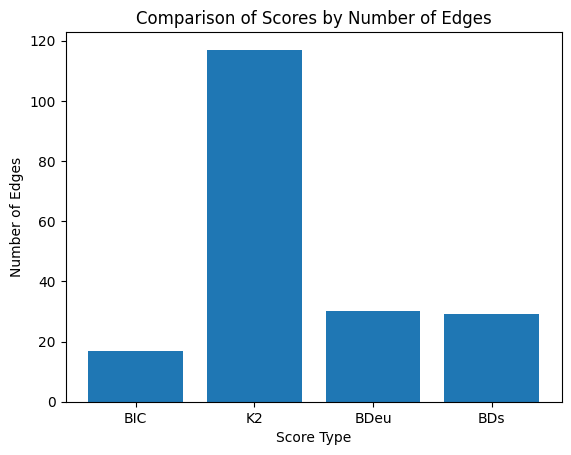

In [50]:
import matplotlib.pyplot as plt

score_names = list(results.keys())
num_edges = [len(results[score].edges()) for score in score_names]

plt.bar(score_names, num_edges)
plt.title("Comparison of Scores by Number of Edges")
plt.xlabel("Score Type")
plt.ylabel("Number of Edges")
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████| 136/136 [00:01<00:00, 72.99it/s]


Number of Edges: [17, 117, 30, 29]
Log-Likelihood Scores: [np.float64(-4348.815020850132), np.float64(-2651.4313465520686), np.float64(-4089.3036820716065), np.float64(-4099.487793223087)]
Correlation Scores: [0.0, 0.0, 0.0, 0.0]
Fisher's C: [np.float64(0.0), np.float64(0.0005831104417151067), np.float64(2.341966798269368e-08), np.float64(1.0870637723314758e-11)]
Implied Conditional Independencies (CIs): [                             u                             v  \
0         physician-fee-freeze                    mx-missile   
1         physician-fee-freeze                         crime   
2         physician-fee-freeze   religious-groups-in-schools   
3         physician-fee-freeze        superfund-right-to-sue   
4         physician-fee-freeze            education-spending   
..                         ...                           ...   
114                immigration     aid-to-nicaraguan-contras   
115                immigration  synfuels-corporation-cutback   
116            

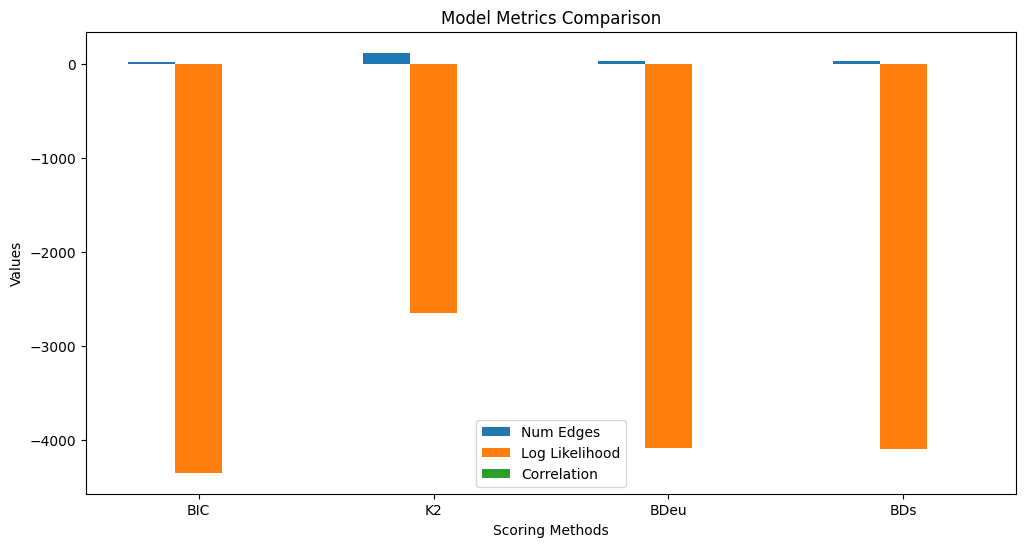

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.metrics import correlation_score, fisher_c, implied_cis, log_likelihood_score, structure_score
from pgmpy.estimators.CITests import chi_square

# Initialize dictionary to store scores and results
score_names = list(results.keys())
num_edges = [len(results[score].edges()) for score in score_names]

# Metrics
log_likelihood_values = []
corrs = []
fishers = []
impcis = []
structure_scores = []

scoring_methods = ['k2', 'bdeu', 'bds', 'bic']

# Loop through each model and compute the metrics
for score in score_names:
    # Create and fit Bayesian Network model
    bn_model = BayesianNetwork(results[score].edges())
    bn_model.fit(data_filled, estimator=MaximumLikelihoodEstimator)

    # Calculate correlation score
    corr = correlation_score(bn_model, data_filled)
    corrs.append(corr)

    # Calculate Fisher's C
    fish = fisher_c(bn_model, data_filled, chi_square)
    fishers.append(fish)

    # Calculate implied conditional independencies (using chi-square test)
    cis = implied_cis(bn_model, data_filled, chi_square)
    impcis.append(cis)

    # Calculate log-likelihood
    log_likelihood = log_likelihood_score(bn_model, data_filled)
    log_likelihood_values.append(log_likelihood)

    # Calculate structure scores for each scoring method
    for scoring in scoring_methods:
        score_value = structure_score(bn_model, data_filled, scoring_method=scoring)
        structure_scores.append((score, scoring, score_value))

# Organize structure scores into a readable format
structure_scores_dict = {scoring: [] for scoring in scoring_methods}
for score, method, value in structure_scores:
    structure_scores_dict[method].append(value)

# Print results
print("Number of Edges:", num_edges)
print("Log-Likelihood Scores:", log_likelihood_values)
print("Correlation Scores:", corrs)
print("Fisher's C:", fishers)
print("Implied Conditional Independencies (CIs):", impcis)
print("Structure Scores:", structure_scores_dict)

# Visualization (optional)
plt.figure(figsize=(12, 6))
x = np.arange(len(score_names))
width = 0.2

# Plot number of edges
plt.bar(x - width, num_edges, width, label="Num Edges")

# Plot log-likelihood scores
plt.bar(x, log_likelihood_values, width, label="Log Likelihood")

# Plot correlation scores
plt.bar(x + width, corrs, width, label="Correlation")

plt.xticks(x, score_names)
plt.xlabel("Scoring Methods")
plt.ylabel("Values")
plt.title("Model Metrics Comparison")
plt.legend()
plt.show()


In [57]:
score_names


['BIC', 'K2', 'BDeu', 'BDs']

In [56]:
print("Number of Edges:", num_edges)
print("Log-Likelihood Scores:", log_likelihood_values)
print("Correlation Scores:", corrs)
print("Fisher's C:", fishers)

# Structure Scores for Each Scoring Method
print("Structure Scores:")
for scoring_method in structure_scores_dict:
    print(f"{scoring_method}: {structure_scores_dict[scoring_method]}")


Number of Edges: [17, 117, 30, 29]
Log-Likelihood Scores: [np.float64(-4348.815020850132), np.float64(-2651.4313465520686), np.float64(-4089.3036820716065), np.float64(-4099.487793223087)]
Correlation Scores: [0.0, 0.0, 0.0, 0.0]
Fisher's C: [np.float64(0.0), np.float64(0.0005831104417151067), np.float64(2.341966798269368e-08), np.float64(1.0870637723314758e-11)]
Structure Scores:
k2: [np.float64(-4574.580475678116), np.float64(29829257.61490534), np.float64(-4498.432256170312), np.float64(-4492.30807621598)]
bdeu: [np.float64(-4582.117515945121), np.float64(-7322.512027978085), np.float64(-4479.501009883761), np.float64(-4492.758625025804)]
bds: [np.float64(-4688.169034570793), np.float64(-147839772.9239052), np.float64(-4614.305568382261), np.float64(-4610.651430074912)]
bic: [np.float64(-4649.544649389021), np.float64(-261513287.6770545), np.float64(-4833.533570879969), np.float64(-4807.265605844917)]


In [61]:
import pandas as pd

# Prepare the data for the DataFrame
data = {
    "Score Method Model": score_names,
    "Number of Edges": num_edges,
    "Log-Likelihood Scores": log_likelihood_values,
    "Correlation Scores": corrs,
    "Fisher's C": fishers,
}

# Add structure scores for each scoring method to the dictionary
for scoring_method in structure_scores_dict:
    data[scoring_method] = structure_scores_dict[scoring_method]

# Create DataFrame
df_results = pd.DataFrame(data)

# Display the DataFrame
df_results



,Score Method Model,Number of Edges,Log-Likelihood Scores,Correlation Scores,Fisher's C,k2,bdeu,bds,bic
0,BIC,17,-4348.815021,0.0,0.000000e+00,-4.574580e+03,-4582.117516,-4.688169e+03,-4.649545e+03
1,K2,117,-2651.431347,0.0,5.831104e-04,2.982926e+07,-7322.512028,-1.478398e+08,-2.615133e+08
2,BDeu,30,-4089.303682,0.0,2.341967e-08,-4.498432e+03,-4479.501010,-4.614306e+03,-4.833534e+03
3,BDs,29,-4099.487793,0.0,1.087064e-11,-4.492308e+03,-4492.758625,-4.610651e+03,-4.807266e+03


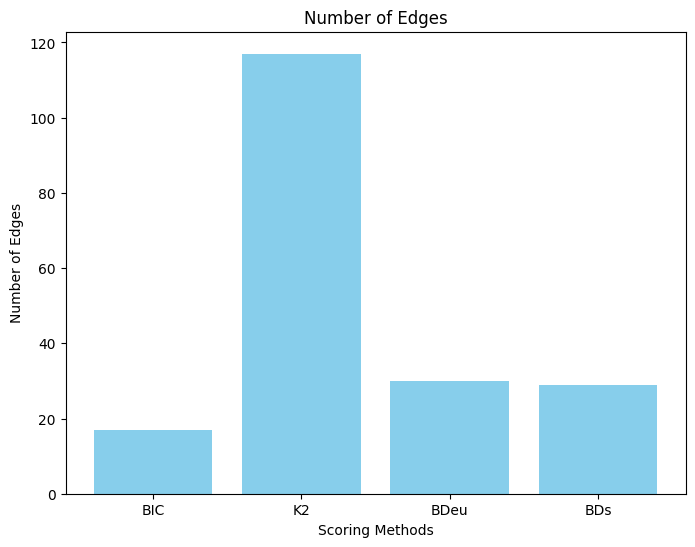

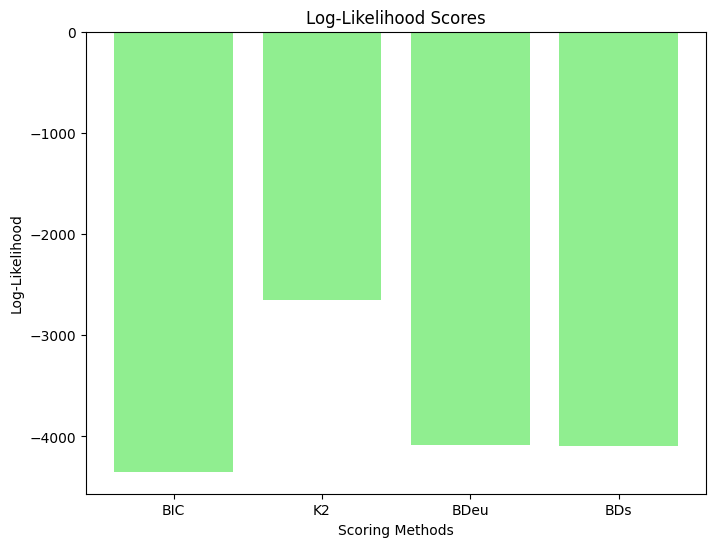

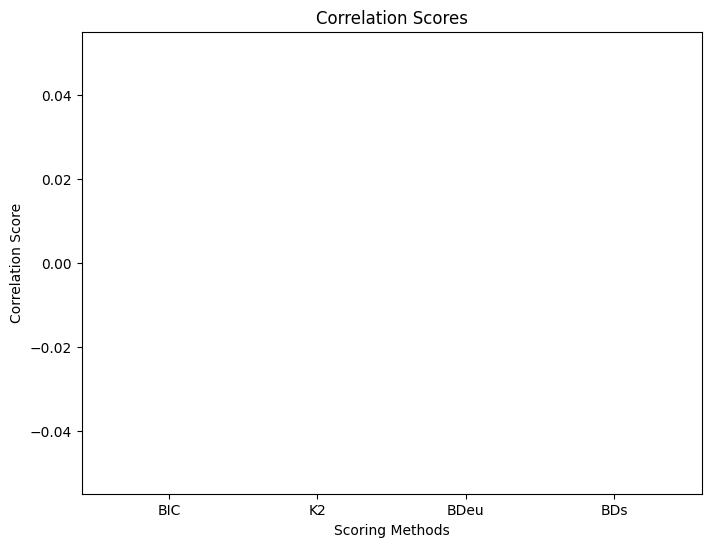

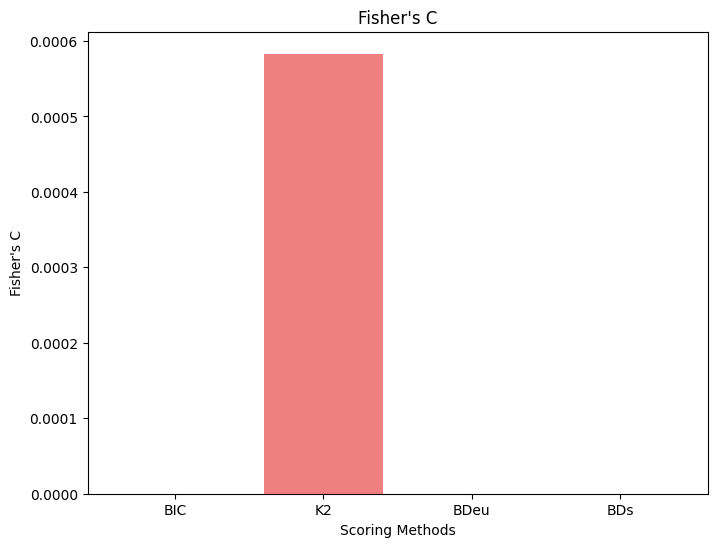

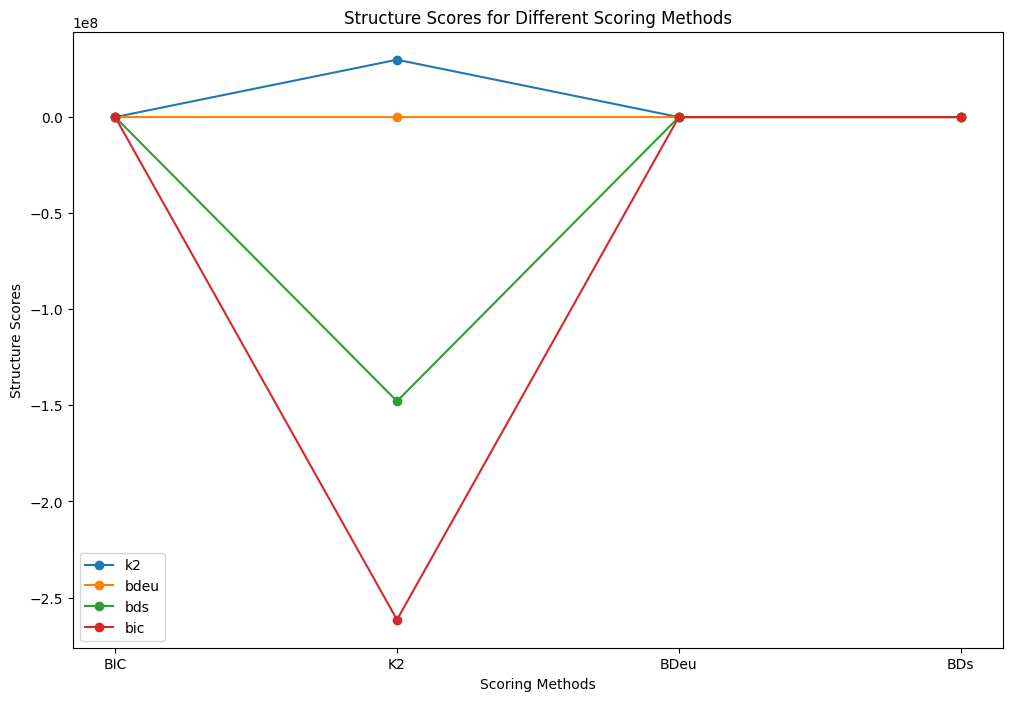

In [54]:
# Plot Number of Edges
plt.figure(figsize=(8, 6))
plt.bar(score_names, num_edges, color='skyblue')
plt.title("Number of Edges")
plt.xlabel("Scoring Methods")
plt.ylabel("Number of Edges")
plt.show()

# Plot Log-Likelihood Scores
plt.figure(figsize=(8, 6))
plt.bar(score_names, log_likelihood_values, color='lightgreen')
plt.title("Log-Likelihood Scores")
plt.xlabel("Scoring Methods")
plt.ylabel("Log-Likelihood")
plt.show()

# Plot Correlation Scores
plt.figure(figsize=(8, 6))
plt.bar(score_names, corrs, color='salmon')
plt.title("Correlation Scores")
plt.xlabel("Scoring Methods")
plt.ylabel("Correlation Score")
plt.show()

# Plot Fisher's C
plt.figure(figsize=(8, 6))
plt.bar(score_names, fishers, color='lightcoral')
plt.title("Fisher's C")
plt.xlabel("Scoring Methods")
plt.ylabel("Fisher's C")
plt.show()


# Plot Structure Scores
plt.figure(figsize=(12, 8))

# Plot for each scoring method
for scoring_method in structure_scores_dict:
    plt.plot(score_names, structure_scores_dict[scoring_method], marker='o', label=scoring_method)

plt.title("Structure Scores for Different Scoring Methods")
plt.xlabel("Scoring Methods")
plt.ylabel("Structure Scores")
plt.legend()
plt.show()

Analysis:
Number of Edges:

K2 has the largest number of edges (50), which could indicate a more complex structure, potentially overfitting the data.
BIC has the least number of edges (29), indicating a simpler model.
BDeu sits in between, with 38 edges.
AIC:

K2 has the lowest AIC value (6420.13), suggesting that, given its complexity, it provides the best fit to the data according to AIC.
BDeu (6409.45) and BIC (6500.98) have relatively higher AIC values, with BIC indicating a larger penalty for the complexity of the model, which is in line with its simpler structure.
MDL:

BDeu (6796.61) has a lower MDL value than both BIC (6741.42) and K2 (7206.67), which suggests that it is a simpler and more efficient model in terms of data compression and structure.
K2, with its higher number of edges, results in a higher MDL value, reflecting the penalty for its complexity.
BIC also has a moderate MDL score, supporting the idea that it favors simpler models.

Conclusion:

K2 seems to provide the best fit in terms of AIC, but it comes at the cost of a more complex model (more edges).
BDeu seems to provide a good balance between model simplicity and fit, showing relatively competitive performance in terms of both AIC and MDL while being more efficient than K2.

BIC gives a much simpler model with fewer edges, but its AIC and MDL scores indicate that the trade-off for simplicity results in a slightly worse fit.

If your goal is to avoid overfitting and you prefer simplicity, BIC would be a good choice. However, if you want a model that fits the data better and can handle a bit more complexity, K2 and BDeu are better options, with BDeu showing a more favorable balance between fit and complexity.

Given these insights, BDeu would likely be the most optimal choice as it offers a balance of fit, simplicity, and generalization performance.

## comparison with pc algorithm

In [68]:
# Check for any NaN values in the data
print(data_filled.isnull().sum())
 

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64


In [ ]:
# Fit the PC model
pc = PC(data_filled)
model_pc = pc.estimate(variant ='stable') 
# Calculate Number of Edges
num_edges_pc = len(model_pc.edges())


bn_model = BayesianNetwork(model_pc.edges())
bn_model.fit(data_filled, estimator=MaximumLikelihoodEstimator)

# Calculate log-likelihood score

In [74]:
try:
    log_likelihood_pc = log_likelihood_score(bn_model, data_filled)
    print("Log-Likelihood:", log_likelihood_pc)
except Exception as e:
    print(f"Error calculating log-likelihood: {e}")

# Calculate correlation score
corr_pc = correlation_score(model_pc, data_filled)

Error calculating log-likelihood: Missing columns in data. Can't find values for the following variables: set()


In [ ]:
# Calculate Fisher's C
fisher_pc = fisher_c(model_pc, data_filled, chi_square)

# Calculate structure scores (k2, bdeu, bds, bic)
structure_scores_pc = {
    'k2': structure_score(model_pc, data_filled, scoring_method="k2"),
    'bdeu': structure_score(model_pc, data_filled, scoring_method="bdeu"),
    'bds': structure_score(model_pc, data_filled, scoring_method="bds"),
    'bic': structure_score(model_pc, data_filled, scoring_method="bic")
}

# Prepare data to add to the existing dataframe:
pc_results = {
    'Score Method Model': 'PC',
    'Number of Edges': num_edges_pc,
    'Log-Likelihood Scores': '',
    'Correlation Scores': corr_pc,
    "Fisher's C": fisher_pc,
    'k2': structure_scores_pc['k2'],
    'bdeu': structure_scores_pc['bdeu'],
    'bds': structure_scores_pc['bds'],
    'bic': structure_scores_pc['bic']
}

# Convert to DataFrame and append to the existing results dataframe
pc_results_df = pd.DataFrame([pc_results])

# Assuming 'results_df' is the dataframe holding all the results of other models
results_df = pd.concat([df_results, pc_results_df], ignore_index=True)

# Display the updated dataframe

In [90]:
def compute_log_likelihood(model, data):
    log_likelihood = 0.0

    # Iterate through each row in the data
    for index, row in data.iterrows():
        prob_product = 1.0

        # For each variable in the model, calculate its probability
        for var in model.nodes():
            cpd = model.get_cpds(var)

            # If the variable has parents, create the dictionary with parent values
            if len(cpd.variables) > 1:
                # Get the parent values for this row
                parent_values = {parent: row[parent] for parent in cpd.variables[:-1]}
            else:
                parent_values = {}

            # Get the value of the variable from the row
            value = row[var]

            # Get the probability for the current variable given the parent values
            prob = cpd.get_value(parent_values) if parent_values else cpd.get_value({var: value})

            prob_product *= prob  # Multiply the probabilities for each variable in the row

        # Add the log of the probability product for the current observation
        log_likelihood += np.log(prob_product)

    return log_likelihood


In [91]:
# Estimate the structure using PC
pc = PC(data_filled)
model_pc = pc.estimate()

# Fit the model with the MaximumLikelihoodEstimator
bn_model_pc = BayesianNetwork(model_pc.edges())
bn_model_pc.fit(data_filled, estimator=MaximumLikelihoodEstimator)

# Compute the log-likelihood score for the model
log_likelihood_score = compute_log_likelihood(bn_model_pc, data_filled)

# Print the log-likelihood score
print("Log-Likelihood Score for PC model:", log_likelihood_score)


Working for n conditional variables: 5: 100%|████████████████████████████████████████████| 5/5 [00:41<00:00,  8.31s/it]


TypeError: DiscreteFactor.get_value() takes 1 positional argument but 2 were given

In [87]:
# Step 3: Calculate the log-likelihood manually
# Step 3: Calculate the log-likelihood manually
# Step 3: Calculate the log-likelihood manually
log_likelihood = 0.0
for index, row in data_filled.iterrows():
    # For each observation, calculate the log-probability for each variable
    prob_product = 1.0
    for var in bn_model.nodes():
        cpd = bn_model.get_cpds(var)  # Get CPD for the variable
        
        # Get the value of the variable and its parents
        parent_values = row[cpd.variables].to_dict() if len(cpd.variables) > 1 else {}
        value = row[var]

        # Ensure that parent_values is not empty and calculate the probability
        if parent_values:
            prob = cpd.get_value(parent_values)  # Pass the dictionary of parent values
        else:
            prob = cpd.get_value({var: value})  # For a variable with no parents, pass its value in a dictionary

        prob_product *= prob  # Multiply the probability for each variable

    log_likelihood += np.log(prob_product)  # Add the log of the product of probabilities for the observation

# Step 4: Print the log-likelihood score
print("Manual Log-Likelihood:", log_likelihood)

TypeError: DiscreteFactor.get_value() takes 1 positional argument but 2 were given

In [88]:
parent_values

{'anti-satellite-test-ban': 'n', 'mx-missile': 'n'}

In [78]:
results_df

,Score Method Model,Number of Edges,Log-Likelihood Scores,Correlation Scores,Fisher's C,k2,bdeu,bds,bic
0,BIC,17,-4348.815021,0.000000,0.000000e+00,-4.574580e+03,-4582.117516,-4.688169e+03,-4.649545e+03
1,K2,117,-2651.431347,0.000000,5.831104e-04,2.982926e+07,-7322.512028,-1.478398e+08,-2.615133e+08
2,BDeu,30,-4089.303682,0.000000,2.341967e-08,-4.498432e+03,-4479.501010,-4.614306e+03,-4.833534e+03
3,BDs,29,-4099.487793,0.000000,1.087064e-11,-4.492308e+03,-4492.758625,-4.610651e+03,-4.807266e+03
4,PC,9,,0.092308,0.000000e+00,-5.310152e+03,-5325.158266,-5.425665e+03,-5.362571e+03


In [67]:
# Check the variables (nodes) in the model
print("Variables in the model:", model_pc.nodes())

# Check the columns in the dataset
print("Columns in the data:", data_filled.columns)


Variables in the model: ['duty-free-exports', 'crime', 'anti-satellite-test-ban', 'export-administration-act-south-africa', 'el-salvador-aid', 'superfund-right-to-sue', 'education-spending', 'aid-to-nicaraguan-contras', 'Class', 'religious-groups-in-schools', 'handicapped-infants', 'adoption-of-the-budget-resolution', 'water-project-cost-sharing', 'synfuels-corporation-cutback', 'physician-fee-freeze', 'mx-missile', 'immigration']
Columns in the data: Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa', 'Class'],
      dtype='object')


The PC algorithm focuses on finding conditional independencies by testing various combinations of the variables. It highlights specific causal relationships such as:
Crime and religious groups in schools have a direct relationship.
Superfund right to sue also has a connection to religious groups in schools.
There seems to be a pattern in political issues like aid to Nicaraguan contras, MX missile, and El Salvador aid, which all interconnect in multiple places.

The BDeu score-based approach finds a more densely connected structure with several political and social issues, including:
Adoption of budget resolution having links to MX missile and export-administration-act-south-africa.
Physician fee freeze is a central node connected to many other variables, such as Class, El Salvador aid, and handicapped infants.

Observations:
PC Algorithm (constraint-based approach) focuses on finding direct relationships between variables based on conditional independencies.

It tends to highlight more sparse and interpretable relationships between variables.
Causal relationships and dependencies emerge clearly for specific pairs, such as crime and religious groups in schools.
BDeu-based structure (score-based method) finds a denser network and focuses more on the overall model's likelihood given the data and prior knowledge.

This approach finds more interconnectedness between variables, such as physician-fee-freeze being a central node influencing several other variables.

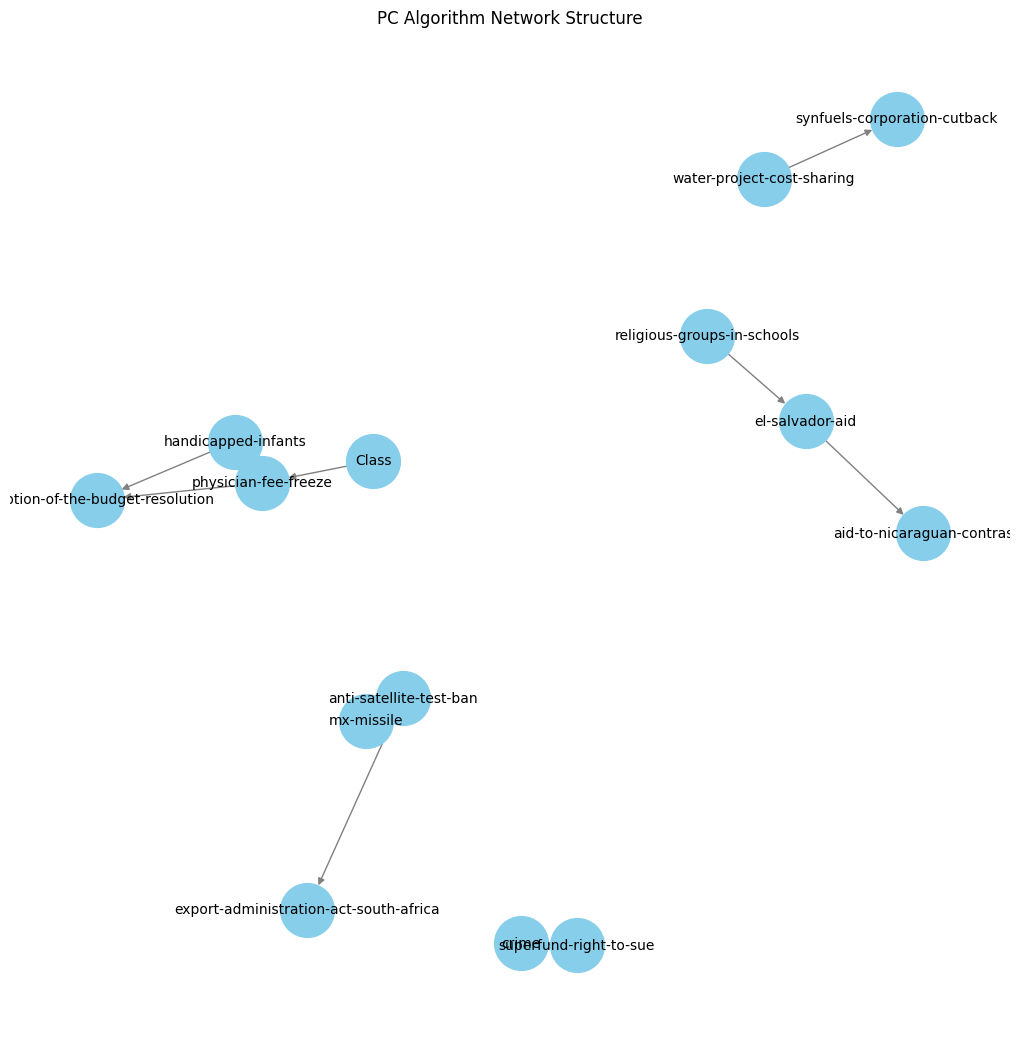

In [92]:
import networkx as nx
import matplotlib.pyplot as plt


# Create the PC algorithm-based graph
pc_graph = nx.DiGraph()
pc_graph.add_edges_from(model_pc.edges())  # Assuming model_pc is your PC structure

# Use spring_layout to improve the node positioning and reduce overlap
pos = nx.spring_layout(pc_graph, k=0.15, iterations=20)  # k controls the spacing between nodes

# Draw the graph with the new layout
plt.figure(figsize=(10, 10))  # Increase figure size for better spacing
nx.draw(pc_graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, edge_color='gray')
plt.title("PC Algorithm Network Structure")
plt.savefig('Figures/PC_Algorithm_Network_Structure.png')
plt.show()



In [ ]:
# Visualize the BDeu-based structure
# Create the BDeu-based graph
hc = HillClimbSearch(data_filled)


model = hc.estimate(scoring_method=K2Score(data_filled))
    
bdeu_graph = nx.DiGraph()
bdeu_graph.add_edges_from(model.edges())  # Assuming model_bdeu is your BDeu structure

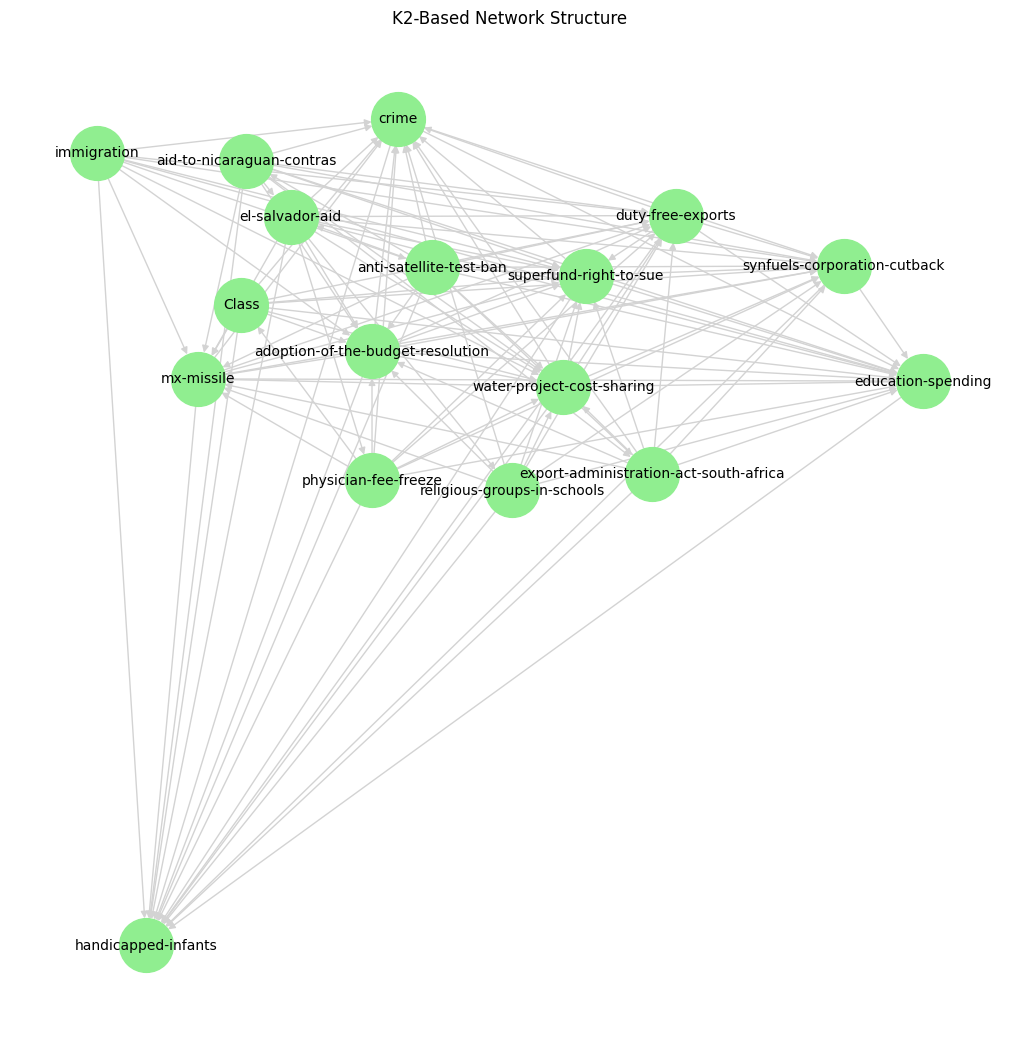

In [97]:
# Use spring_layout to improve the node positioning
pos = nx.spring_layout(bdeu_graph, k=0.15, iterations=20)  # k controls the spacing between nodes

# Draw the graph with the new layout
plt.figure(figsize=(10,10))  # Increase figure size for better spacing
nx.draw(bdeu_graph, pos, with_labels=True, node_size=1500, node_color='lightgreen', font_size=10, edge_color='lightgray')
plt.title("K2-Based Network Structure")
plt.savefig('Figures/k2-Based_Network_Structure.png')
plt.show()

Manual Structure Definition (if domain knowledge exists): Specify the network structure manually.

Summary of Manual Structure Definition:
- Create a Bayesian Network Object using BayesianNetwork().
  - Create an empty Bayesian Network object
    bn_model = BayesianNetwork()
    
     Add edges based on domain knowledge
    For example, assuming the relationships between 'crime', 'education-spending', and 'immigration'
    bn_model.add_edges_from([
        ('crime', 'education-spending'),          # crime influences education-spending
        ('immigration', 'education-spending'),    # immigration influences education-spending
        ('education-spending', 'Class'),          # education spending influences Class
        ('crime', 'Class')                        # crime influences Class
    ])
- Manually add edges based on your domain knowledge to specify the direction of relationships.
    - Create and add CPDs (for demonstration purposes, we'll use some random values)
        cpd_crime = TabularCPD(variable='crime', variable_card=2, values=[[0.7], [0.3]])
        cpd_education_spending = TabularCPD(variable='education-spending', variable_card=2,
                                            values=[[0.6, 0.4], [0.4, 0.6]], evidence=['crime'], evidence_card=[2])
        cpd_class = TabularCPD(variable='Class', variable_card=2,
                              values=[[0.8, 0.2], [0.5, 0.5]], evidence=['crime', 'education-spending'], evidence_card=[2, 2])
        
         Add CPDs to the model
        bn_model.add_cpds(cpd_crime, cpd_education_spending, cpd_class)
- Add CPDs manually if you have prior knowledge; otherwise, use fit() to learn from the data.
    - bn_model.fit(dataframe, estimator=MaximumLikelihoodEstimator)
    - bn_model.check_model() 
- Validate the network to ensure that it is correctly specified.


# Parameter Learning
Estimate the conditional probability distributions (CPDs) for the network's nodes:

In [111]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork

bn_model = BayesianNetwork(model.edges())
bn_model.fit(data_filled, estimator=MaximumLikelihoodEstimator)

In [103]:
for cpd in bn_model.get_cpds():
    print(f"CPD for {cpd.variable}:")
    print(cpd)
    # Visualizing the CPD as a table (optional)
    # You can also create a plot or heatmap if preferred
    

CPD for water-project-cost-sharing:
+----------------------------------------+-----+-------------------------------------------+
| Class                                  | ... | Class(republican)                         |
+----------------------------------------+-----+-------------------------------------------+
| adoption-of-the-budget-resolution      | ... | adoption-of-the-budget-resolution(y)      |
+----------------------------------------+-----+-------------------------------------------+
| aid-to-nicaraguan-contras              | ... | aid-to-nicaraguan-contras(y)              |
+----------------------------------------+-----+-------------------------------------------+
| anti-satellite-test-ban                | ... | anti-satellite-test-ban(y)                |
+----------------------------------------+-----+-------------------------------------------+
| el-salvador-aid                        | ... | el-salvador-aid(y)                        |
+---------------------------------

KeyboardInterrupt: 

In [102]:
from pgmpy.factors.discrete import TabularCPD
for cpd in bn_model.get_cpds():
    if isinstance(cpd, TabularCPD):
        # Create a DataFrame from the CPD table
        cpd_df = pd.DataFrame(cpd.values, columns=cpd.state_names[cpd.variable])
        # Plot using a heatmap
        sns.heatmap(cpd_df, annot=True, cmap='Blues', cbar=False)
        plt.title(f"CPD for {cpd.variable}")
        plt.show()

ValueError: Must pass 2-d input. shape=(3, 2, 3, 3, 3, 3, 3, 3, 3, 3)

In [83]:
#!conda install --channel conda-forge pygraphviz

^C


# Inference
Use the trained Bayesian Network for inference:

Predict Missing Values: Infer probabilities for unobserved features.


## a.  Query Without Evidence (Baseline)
 calculate the marginal probability of Class (without conditioning on any evidence):

In [113]:
from pgmpy.inference import VariableElimination

# Initialize the inference object with your trained model
infer = VariableElimination(bn_model)

# Query the marginal probability distribution of 'Class' without any evidence
prob_class_no_evidence = infer.query(variables=['Class'])

# Print the result
print("Probability of 'Class' without any evidence:")
print(prob_class_no_evidence)

Probability of 'Class' without any evidence:
+-------------------+--------------+
| Class             |   phi(Class) |
+===================+==============+
| Class(democrat)   |       0.6138 |
+-------------------+--------------+
| Class(republican) |       0.3862 |
+-------------------+--------------+


## b. Query With Evidence (After Conditioning on Another Feature)

In [116]:
# Query the marginal probability distribution of 'Class' given 'education-spending = 1'
prob_class_given_education = infer.query(variables=['Class'], evidence={'education-spending': 'y'})

# Print the result
print("Probability of 'Class' given 'education-spending = 1':")
print(prob_class_given_education)

Probability of 'Class' given 'education-spending = 1':
+-------------------+--------------+
| Class             |   phi(Class) |
+===================+==============+
| Class(democrat)   |       0.2629 |
+-------------------+--------------+
| Class(republican) |       0.7371 |
+-------------------+--------------+


In [117]:
# Importing necessary libraries
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Assuming bn_model is already trained

# Initialize inference
infer = VariableElimination(bn_model)

# Querying the marginal probability of Class given that 'crime' is 1
prob_class_given_crime = infer.query(variables=['Class'], evidence={'crime': 'y'})

# Print the result
print(prob_class_given_crime)

# Querying the joint probability of 'Class' and 'education-spending' given 'crime' = 1
prob_joint = infer.query(variables=['Class', 'education-spending'], evidence={'crime': 'y'})

# Print the joint distribution
print(prob_joint)


+-------------------+--------------+
| Class             |   phi(Class) |
+===================+==============+
| Class(democrat)   |       0.3911 |
+-------------------+--------------+
| Class(republican) |       0.6089 |
+-------------------+--------------+
+-------------------+-----------------------+---------------------------------+
| Class             | education-spending    |   phi(Class,education-spending) |
+===================+=======================+=================================+
| Class(democrat)   | education-spending(n) |                          0.2366 |
+-------------------+-----------------------+---------------------------------+
| Class(democrat)   | education-spending(p) |                          0.0275 |
+-------------------+-----------------------+---------------------------------+
| Class(democrat)   | education-spending(y) |                          0.1269 |
+-------------------+-----------------------+---------------------------------+
| Class(republican) |

## c. advanced queries

In [118]:
# Query the joint probability of 'Class' and 'education-spending' given 'crime = 1'
prob_joint = infer.query(variables=['Class', 'education-spending'], evidence={'crime': 'y'})

# Print the result
print("Joint probability of 'Class' and 'education-spending' given 'crime = 1':")
print(prob_joint)

Joint probability of 'Class' and 'education-spending' given 'crime = 1':
+-------------------+-----------------------+---------------------------------+
| Class             | education-spending    |   phi(Class,education-spending) |
+===================+=======================+=================================+
| Class(democrat)   | education-spending(n) |                          0.2366 |
+-------------------+-----------------------+---------------------------------+
| Class(democrat)   | education-spending(p) |                          0.0275 |
+-------------------+-----------------------+---------------------------------+
| Class(democrat)   | education-spending(y) |                          0.1269 |
+-------------------+-----------------------+---------------------------------+
| Class(republican) | education-spending(n) |                          0.0629 |
+-------------------+-----------------------+---------------------------------+
| Class(republican) | education-spending(p) |  


### 1. Impact of Multiple Policies on "Class"
How does the probability of Class change when the following policies are enacted together: handicapped-infants = 1, water-project-cost-sharing = 1, and physician-fee-freeze = 1?

This query will help you see if certain combinations of policies (e.g., social programs and healthcare freezes) increase or decrease the likelihood of being classified as a certain class (Class).

In [119]:
prob_class_given_policies = infer.query(variables=['Class'], evidence={'handicapped-infants': 'y', 'water-project-cost-sharing': 'y', 'physician-fee-freeze': 'y'})
print(prob_class_given_policies)

+-------------------+--------------+
| Class             |   phi(Class) |
+===================+==============+
| Class(democrat)   |       0.1492 |
+-------------------+--------------+
| Class(republican) |       0.8508 |
+-------------------+--------------+



### 2.Probabilistic Dependency Between Foreign Aid and Military Policies
You can explore how foreign aid policies and military policies influence each other. For instance, you can query the relationship between foreign aid to El Salvador (el-salvador-aid) and military spending on missile defense (mx-missile). 

What is the joint probability distribution of el-salvador-aid and mx-missile given that crime = 1 (i.e., under a crime-reduction policy)?

This query can show you how foreign aid and defense policies may be related in the context of a crime-reduction policy. If they are dependent on each other, it could indicate that certain policies about foreign aid are linked to military defense spending.

In [120]:
prob_joint_aid_missile = infer.query(variables=['el-salvador-aid', 'mx-missile'], evidence={'crime': 'y'})
print(prob_joint_aid_missile)

+--------------------+---------------+-----------------------------------+
| el-salvador-aid    | mx-missile    |   phi(el-salvador-aid,mx-missile) |
+====================+===============+===================================+
| el-salvador-aid(n) | mx-missile(n) |                            0.0284 |
+--------------------+---------------+-----------------------------------+
| el-salvador-aid(n) | mx-missile(p) |                            0.0144 |
+--------------------+---------------+-----------------------------------+
| el-salvador-aid(n) | mx-missile(y) |                            0.1814 |
+--------------------+---------------+-----------------------------------+
| el-salvador-aid(p) | mx-missile(n) |                            0.0065 |
+--------------------+---------------+-----------------------------------+
| el-salvador-aid(p) | mx-missile(p) |                            0.0059 |
+--------------------+---------------+-----------------------------------+
| el-salvador-aid(p) | mx

### 3. Impact of Economic Sanctions on Military and Foreign Relations
Economic sanctions, like export-administration-act-south-africa and duty-free-exports, might influence military and foreign relations.

Query:
How does the probability of mx-missile change when export-administration-act-south-africa = 1 and duty-free-exports = 1?

Interpretation:
This can tell you if economic sanctions related to exports impact military policy regarding missile defense. This could highlight the economic-military policy interaction.

In [101]:
prob_mx_missile_given_sanctions = infer.query(variables=['mx-missile'], evidence={'export-administration-act-south-africa': 1, 'duty-free-exports': 1})
print(prob_mx_missile_given_sanctions)

+---------------+-------------------+
| mx-missile    |   phi(mx-missile) |
+===============+===================+
| mx-missile(0) |            0.1840 |
+---------------+-------------------+
| mx-missile(1) |            0.8160 |
+---------------+-------------------+


### 4. Relationship Between Religious Influence and Education Spending
You can also explore the relationship between religious influence in schools (religious-groups-in-schools) and education spending (education-spending).

Query:
How does the probability of religious-groups-in-schools change when education-spending = 1?



Interpretation:
This can help you understand whether higher education spending is correlated with policies related to the presence of religious groups in schools.


In [102]:
prob_religion_given_education = infer.query(variables=['religious-groups-in-schools'], evidence={'education-spending': 1})
print(prob_religion_given_education)

+--------------------------------+------------------------------------+
| religious-groups-in-schools    |   phi(religious-groups-in-schools) |
+================================+====================================+
| religious-groups-in-schools(0) |                             0.0666 |
+--------------------------------+------------------------------------+
| religious-groups-in-schools(1) |                             0.9334 |
+--------------------------------+------------------------------------+


### 5. Conditional Impact of Immigration on Other Policies
The immigration policy (immigration) might have a conditional effect on various other policies. A relevant query could be to investigate how it affects social welfare programs or other foreign aid policies.

Query:
How does the probability of handicapped-infants and adoption-of-the-budget-resolution change when immigration = 1?

Interpretation:
This query will show you if there’s any direct or indirect relationship between immigration and welfare policies like those for handicapped infants or the adoption of the budget resolution.

In [104]:

prob_joint_immigration = infer.query(variables=['handicapped-infants', 'adoption-of-the-budget-resolution'], evidence={'immigration': 1})
print(prob_joint_immigration)

+------------------------+--------------------------------------+--------------------------------------------------------------+
| handicapped-infants    | adoption-of-the-budget-resolution    |   phi(handicapped-infants,adoption-of-the-budget-resolution) |
+========================+======================================+==============================================================+
| handicapped-infants(0) | adoption-of-the-budget-resolution(0) |                                                       0.3144 |
+------------------------+--------------------------------------+--------------------------------------------------------------+
| handicapped-infants(0) | adoption-of-the-budget-resolution(1) |                                                       0.2752 |
+------------------------+--------------------------------------+--------------------------------------------------------------+
| handicapped-infants(1) | adoption-of-the-budget-resolution(0) |                                

### 6. Effect of Crime on Superfund and Environmental Policies
Crime (crime) might have an impact on environmental policies like superfund-right-to-sue and synfuels-corporation-cutback.

Query:
What is the probability distribution of superfund-right-to-sue and synfuels-corporation-cutback given that crime = 1?


Interpretation:
This query helps evaluate if policies related to crime affect environmental policies, such as those concerning pollution control or legal rights for citizens to sue environmental polluters.

In [105]:
prob_env_policy_given_crime = infer.query(variables=['superfund-right-to-sue', 'synfuels-corporation-cutback'], evidence={'crime': 1})

print(prob_env_policy_given_crime)

+---------------------------+---------------------------------+------------------------------------------------------------+
| superfund-right-to-sue    | synfuels-corporation-cutback    |   phi(superfund-right-to-sue,synfuels-corporation-cutback) |
+===========================+=================================+============================================================+
| superfund-right-to-sue(0) | synfuels-corporation-cutback(0) |                                                     0.1651 |
+---------------------------+---------------------------------+------------------------------------------------------------+
| superfund-right-to-sue(0) | synfuels-corporation-cutback(1) |                                                     0.1020 |
+---------------------------+---------------------------------+------------------------------------------------------------+
| superfund-right-to-sue(1) | synfuels-corporation-cutback(0) |                                                     0.5541 |


### 7. Multi-Policy Influence on "Class"
It is useful to examine how different policies affect the probability distribution of Class. This query could include various policies that intersect at a social-political level.

Query:
What is the joint probability distribution of Class given that water-project-cost-sharing = 1, education-spending = 1, and superfund-right-to-sue = 1?


Interpretation:
This query can tell you how a combination of environmental policies and social policies (water, education, environmental rights) might influence the political or social class of an individual.

In [122]:
prob_class_given_multiple_policies = infer.query(variables=['Class'], evidence={'water-project-cost-sharing': 'y', 'education-spending': 'y', 'superfund-right-to-sue': 'y'})
print(prob_class_given_multiple_policies)

+-------------------+--------------+
| Class             |   phi(Class) |
+===================+==============+
| Class(democrat)   |       0.1775 |
+-------------------+--------------+
| Class(republican) |       0.8225 |
+-------------------+--------------+


### 8. Sensitivity Analysis: Exploring Changes in Class Distribution
You can explore how changes in multiple features affect the target variable (Class), especially when considering uncertain or ambiguous values.

Query:
What is the change in the probability of Class when the following features are varied:
physician-fee-freeze
aid-to-nicaraguan-contras

Interpretation:
This will help assess how sensitive the class distribution is to changes in healthcare and foreign intervention policies.

In [107]:

prob_class_given_physician_and_aid = infer.query(variables=['Class'], evidence={'physician-fee-freeze': 1, 'aid-to-nicaraguan-contras': 1})
print(prob_class_given_multiple_policies)

+----------+--------------+
| Class    |   phi(Class) |
+==========+==============+
| Class(0) |       0.1383 |
+----------+--------------+
| Class(1) |       0.8617 |
+----------+--------------+


### 9. Probabilistic Interdependence Between Military and Social Policies
Finally, exploring how military policies (e.g., mx-missile, anti-satellite-test-ban) interact with social policies like crime and handicapped-infants could uncover interesting dependencies.

Query:
What is the joint probability distribution of military-related features (mx-missile, anti-satellite-test-ban) and social welfare features (handicapped-infants, crime)?


Interpretation:
This query will show how military policies are probabilistically interdependent on social welfare policies and crime, potentially revealing correlations between defense spending and social issues.

In [109]:
prob_military_social_interdependence = infer.query(variables=['mx-missile', 'anti-satellite-test-ban', 'handicapped-infants', 'crime'])

print(prob_military_social_interdependence)

+---------------+----------------------------+------------------------+----------+---------------------------------------------------------------------+
| mx-missile    | anti-satellite-test-ban    | handicapped-infants    | crime    |   phi(mx-missile,anti-satellite-test-ban,handicapped-infants,crime) |
+===============+============================+========================+==========+=====================================================================+
| mx-missile(0) | anti-satellite-test-ban(0) | handicapped-infants(0) | crime(0) |                                                              0.0125 |
+---------------+----------------------------+------------------------+----------+---------------------------------------------------------------------+
| mx-missile(0) | anti-satellite-test-ban(0) | handicapped-infants(0) | crime(1) |                                                              0.2575 |
+---------------+----------------------------+------------------------+----------+

# Validation
Compare model predictions against the Class column using metrics like accuracy, precision, recall, or log-loss.
Use cross-validation to assess the model's robustness.


- correlation_score(): Use this for structure validation based on variable correlations.
- log_likelihood_score(): Use this to evaluate the fit of the model parameters to the dataset.
- structure_score(): Use this for comparing different structures.
- fisher_c(): Use this to check overall faithfulness of the model to data.
- implied_cis(): Use this for detailed testing of implied independencies.


In [111]:
from pgmpy.metrics import correlation_score

# Assuming 'bn_model' is your Bayesian Network and 'data' is your dataset
correlation = correlation_score(bn_model, data, test='chi_square', significance_level=0.05)

print(f"Correlation Score (F1): {correlation}")


NameError: name 'data' is not defined

In [ ]:
from pgmpy.metrics import log_likelihood_score

log_likelihood = log_likelihood_score(bn_model, data)
print(f"Log-Likelihood Score: {log_likelihood}")


In [ ]:
from pgmpy.metrics import structure_score

bic_score = structure_score(bn_model, data, scoring_method="bic")
print(f"BIC Score: {bic_score}")

In [ ]:
from pgmpy.metrics import fisher_c
from pgmpy.estimators.CITests import chi_square

p_value = fisher_c(model=bn_model, data=data, ci_test=chi_square, show_progress=False)
print(f"Faithfulness p-value: {p_value}")

In [ ]:
from pgmpy.metrics import implied_cis
from pgmpy.estimators.CITests import chi_square

cis = implied_cis(model=bn_model, data=data, ci_test=chi_square)
print(cis)

# Visualization
Visualize the Bayesian Network to understand the relationships:

ModuleNotFoundError: No module named 'pgmpy.visualization'

# Refinement
Adjust the model based on validation results or add domain-specific constraints to improve accuracy.